In [18]:
import os
import pickle
import pandas as pd
import numpy as np

# import matplotlib
from matplotlib import pyplot as plt


In [19]:
data_dir = os.environ.get('DATA_DIR', '/cluster/home/kheuto01/code/opioid-overdose-models/CASTNet/hughes-CASTNet/')


MA

In [20]:
#import CASTNet Results
results_path_1 = os.path.join(data_dir, 'Results/MA_lead_time1.pkl')
results_path_2 = os.path.join(data_dir, 'Results/MA_lead_time2.pkl')

with open(results_path_1, 'rb') as file:
    MA_results_lead_1 = pickle.load(file, encoding='bytes')

with open(results_path_2, 'rb') as file:
    MA_results_lead_2 = pickle.load(file, encoding='bytes')

<BarContainer object of 40 artists>

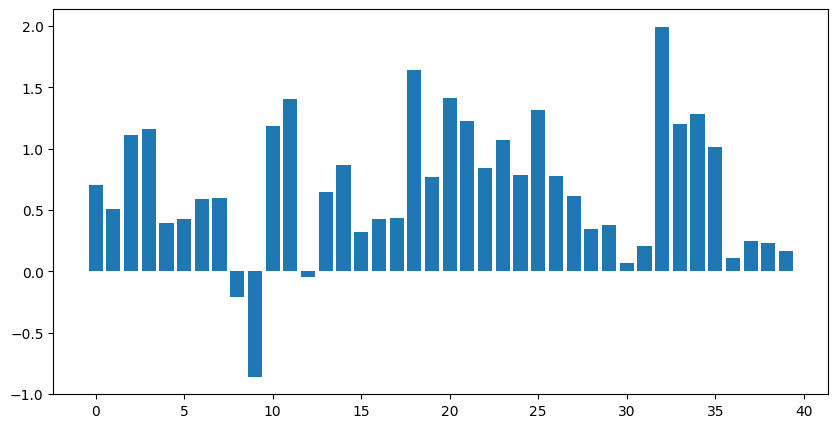

In [21]:
# bar plot of MA_results_lead_1
plt.figure(figsize=(10,5))
plt.bar(x=range(len(MA_results_lead_1['preds'][-1][:40])) , height=MA_results_lead_1['preds'][-1][:40])

In [22]:
# Get every other entry of MA_results_lead1
MA_all_predictions_1 = MA_results_lead_1['preds']
MA_prediction_matrix_1 = np.array(MA_all_predictions_1)
MA_prediction_matrix_1 = np.maximum(MA_prediction_matrix_1, 0) #turn all negative values to 0
MA_prediction_lead_1 = MA_prediction_matrix_1[-1][::2]



In [23]:
MA_all_predictions_2 = MA_results_lead_2['preds']
MA_prediction_matrix_2 = np.array(MA_all_predictions_2)
MA_prediction_matrix_2 = np.maximum(MA_prediction_matrix_2, 0) #turn all negative values to 0
MA_prediction_lead_2 = MA_prediction_matrix_2[-1, 1::2]

In [24]:
locations_path = os.path.join(data_dir, 'Data/MA/locations.txt')
MA_locations = []
with open(locations_path, 'rb') as file:
    for line in file:
        line = line.rstrip().decode("utf-8").split("\t")
        MA_locations.append(line[1])

In [25]:
# Create a DataFrame for prediction_lead_1
df_ma_prediction_lead_1 = pd.DataFrame({
    'geoid': MA_locations,
    'prediction': MA_prediction_lead_1,  
    'year': '2020'
})

# Create a DataFrame for prediction_lead_2
df_ma_prediction_lead_2 = pd.DataFrame({
    'geoid': MA_locations,
    'prediction': MA_prediction_lead_2,  
    'year': '2021'
})

# combine
MA_combined_df = pd.concat([df_ma_prediction_lead_1, df_ma_prediction_lead_2])
csv_filename = "Results/MA-predictions.csv"
csv_filepath = os.path.join(data_dir, csv_filename)

MA_combined_df.to_csv(csv_filepath, index=False)